# Report 1
This report has 2 sections. First, it analyzes the overal frequencies of Tweets based on different factors. Then, in the second section, a specific Job Title will be analyzed, but further statistics are continued in the second report.

## Functions of Sentiment Frequency preparation

In [1]:
# Uncomment and use this snippet to regenerate the CSV file
'''
import sqlite3
import pandas as pd

# For faster data access, we converted a query to a CSV one time to use it multiple times quickly
sqliteConnection = sqlite3.connect("../database.db")
cursor  = sqliteConnection.cursor()
sqlite_select_Query = "SELECT count(*) FROM sqlite_master WHERE type='table' AND name='Tweets'"
cursor.execute(sqlite_select_Query)

for row in cursor:
    if(row[0]==0):
        raise Exception("Sorry, Path to the desired DB is not correct!")

query = "SELECT DISTINCT tweet_id, class, positive_sent, negative_sent, neutral_sent FROM SentimentsPipe ORDER BY tweet_id"
                
df = pd.read_sql(query, sqliteConnection)
df.to_csv('allTweetSentiments.csv')
  
cursor.close()
sqliteConnection.close()
'''

'\nimport sqlite3\nimport pandas as pd\n\n# For faster data accessing, we converted a query to a CSV one time to use it multiple time quickly\nsqliteConnection = sqlite3.connect("../database.db")\ncursor  = sqliteConnection.cursor()\nsqlite_select_Query = "SELECT count(*) FROM sqlite_master WHERE type=\'table\' AND name=\'Tweets\'"\ncursor.execute(sqlite_select_Query)\n\nfor row in cursor:\n    if(row[0]==0):\n        raise Exception("Sorry, Path to the desired DB is not correct!")\n\nquery = "SELECT DISTINCT tweet_id, class, positive_sent, negative_sent, neutral_sent FROM SentimentsPipe ORDER BY tweet_id"\n                \ndf = pd.read_sql(query, sqliteConnection)\ndf.to_csv(\'AllSents.csv\')\n  \ncursor.close()\nsqliteConnection.close()\n'

## Functions of Sentiment Frequency for all Tweets with & without Locations

In [2]:
from difflib import SequenceMatcher
import pandas as pd
import math
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

def loadDataFrame(jobTitle = ""): # Removing Duplicates from Dataframe
    nddf = pd.read_csv('withLocation.csv')
    if(jobTitle != ""):
        newDf = pd.DataFrame()
        for i in range(len(nddf)):
            if(similar(nddf.job_title.iloc[i],jobTitle)>= 0.9):
                newDf=newDf.append([nddf.iloc[i]])
        nddf = newDf
    
    if 'job_title' in nddf.columns:
        nddf['job_title'] = nddf['job_title'].apply(str.lower)
        
    if 'tweet_id' in nddf.columns:
        nddf = nddf[~nddf.tweet_id.duplicated()]
    return nddf

def similar(a, b): # Avoiding traditional english translation of German State names or misspelling
    return SequenceMatcher(None, a.lower(), b.lower()).ratio()

def sentDist(All): # Calculating the distribution of sentiments for all jobs 
    if(All):
        df = pd.read_csv('allTweetSentiments.csv')
    else:
        df = loadDataFrame()
    df["distribution"] = ""
    for i in range(len(df)):
        val = ""
        if(df["class"].iloc[i] == 'positive'):
            val = df.positive_sent.iloc[i]
        elif(df["class"].iloc[i] == 'negative'):
            val = df.negative_sent.iloc[i] * -1
        else:
            if (df.positive_sent.iloc[i]>df.negative_sent.iloc[i]):
                val = df.positive_sent.iloc[i]
            elif (df.positive_sent.iloc[i]<df.negative_sent.iloc[i]):
                val = df.negative_sent.iloc[i]* -1
            else:
                val = 0
        
        df['distribution'].iloc[i] = val

    return df['distribution']

def sentDistWith(jobTitle): # Calculating the distribution of sentiments for a specific job
    df = loadDataFrame(jobTitle)
    df["distribution"] = ""
    for i in range(len(df)):
        val = ""
        if(df["class"].iloc[i] == 'positive'):
            val = df.positive_sent.iloc[i]
        elif(df["class"].iloc[i] == 'negative'):
            val = df.negative_sent.iloc[i] * -1
        else:
            if (df.positive_sent.iloc[i]>df.negative_sent.iloc[i]):
                val = df.positive_sent.iloc[i]
            elif (df.positive_sent.iloc[i]<df.negative_sent.iloc[i]):
                val = df.negative_sent.iloc[i]* -1
            else:
                val = 0
        
        df['distribution'].iloc[i] = val

    return df['distribution']

### All Tweet's Sentiment Frequency

In [3]:
df = pd.read_csv('allTweetSentiments.csv')
if not 'tweet_id' in df.columns:
    print("No output")
else:
    neu = df[df['class'] == 'neutral']
    neg = df[df['class'] == 'negative']
    pos = df[df['class'] == 'positive']

    print(f"Out of {len(df)} Sentiments:","\nNeutral: ", len(neu), "\nNegative: ", len(neg), "\nPositive: ", len(pos))

Out of 2440626 Sentiments: 
Neutral:  1947744 
Negative:  400170 
Positive:  92712


### Frequency Histogram for all Jobs

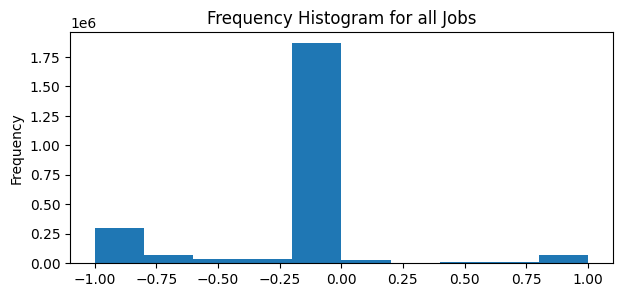

In [4]:
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':100})

x = sentDist(True)
plt.hist(x, bins=10)
plt.gca().set(title='Frequency Histogram for all Jobs', ylabel='Frequency');

### Tweets with Locations Sentiment Frequency for all Job Titles

In [5]:
df = loadDataFrame()
if not 'tweet_id' in df.columns:
    print("No output")
else:
    neu = df[df['class'] == 'neutral']
    neg = df[df['class'] == 'negative']
    pos = df[df['class'] == 'positive']

    print(f"Out of {len(df)} Sentiments:","\nNeutral: ", len(neu), "\nNegative: ", len(neg), "\nPositive: ", len(pos))

Out of 26540 Sentiments: 
Neutral:  18652 
Negative:  5569 
Positive:  2319


### Sentiments Frequency for all Job Titles with Location

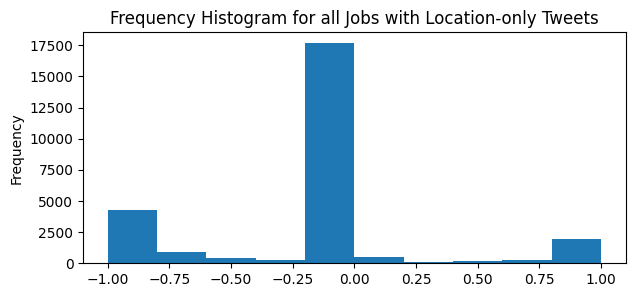

In [6]:
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':100})

x = sentDist(False)
plt.hist(x, bins=10)
plt.gca().set(title='Frequency Histogram for all Jobs with Location-only Tweets', ylabel='Frequency');

### Tweets with Locations Sentiment Frequency for a Job Title

In [7]:
jobTitle = "floristmeister" #regalauffüller
df = loadDataFrame(jobTitle)
if not 'tweet_id' in df.columns:
    print("No output")
else:
    neu = df[df['class'] == 'neutral']
    neg = df[df['class'] == 'negative']
    pos = df[df['class'] == 'positive']

    print(f"Tweets with Locations Sentiment Frequency of: {jobTitle}", "\nOverall Sentiments: ", len(df), "\nNeutral: ", len(neu), "\nNegative: ", len(neg), "\nPositive: ", len(pos))

Tweets with Locations Sentiment Frequency of: floristmeister 
Overall Sentiments:  139 
Neutral:  124 
Negative:  6 
Positive:  9


### Sentiments Frequency for a Job Title

[Text(0.5, 1.0, 'Frequency Histogram for Floristmeister'),
 Text(0, 0.5, 'Frequency')]

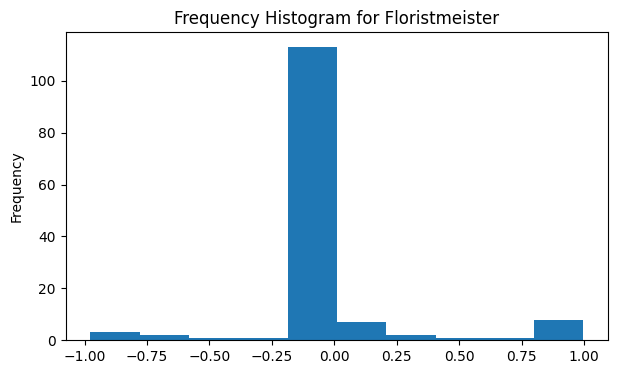

In [8]:
jobTitle = "Floristmeister"

plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':100})

# Plot Histogram on x
x = sentDistWith(jobTitle)
plt.hist(x, bins=10)
plt.gca().set(title=f'Frequency Histogram for {jobTitle}', ylabel='Frequency')